In [59]:
import tensorflow as tf
from tensorflow import keras
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [60]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\kprajapati\\.keras\\datasets\\auto-mpg.data'

In [61]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [62]:
type(dataset)

pandas.core.frame.DataFrame

In [63]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

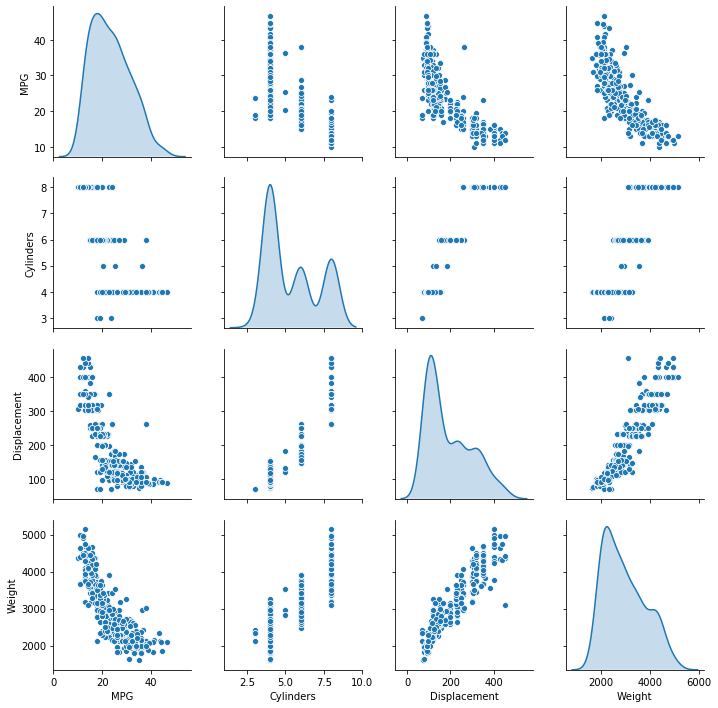

In [64]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [66]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [102]:
train_dataset

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
65,8,351.0,153.0,4129.0,13.0,72,1
132,4,140.0,75.0,2542.0,17.0,74,1
74,8,302.0,140.0,4294.0,16.0,72,1
78,4,120.0,87.0,2979.0,19.5,72,2
37,6,232.0,100.0,3288.0,15.5,71,1
...,...,...,...,...,...,...,...
207,4,130.0,102.0,3150.0,15.7,76,2
279,4,98.0,68.0,2135.0,16.6,78,3
227,6,225.0,100.0,3630.0,17.7,77,1
148,4,116.0,75.0,2246.0,14.0,74,2


In [81]:
train_stats = train_dataset.describe()

## Normalize

In [82]:
def norm(x):
    return (x - train_stats.transpose()['mean']) / train_stats.transpose()['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

## Model

In [148]:
model = keras.Sequential()

In [149]:
model.add(keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1))

In [150]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

In [151]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [152]:
len(train_dataset.keys())

7

In [153]:
normed_train_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
65,1.528471,1.521380,1.265245,1.379315,-0.928344,-1.065117,-0.692317
132,-0.848320,-0.511125,-0.751580,-0.499348,0.502127,-0.525344,-0.692317
74,1.528471,1.049377,0.929107,1.574639,0.144509,-1.065117,-0.692317
78,-0.848320,-0.703780,-0.441299,0.017965,1.396171,-1.065117,0.558574
37,0.340075,0.375086,-0.105162,0.383754,-0.034300,-1.335003,-0.692317
...,...,...,...,...,...,...,...
207,-0.848320,-0.607453,-0.053448,0.220392,0.037224,0.014428,0.558574
279,-0.848320,-0.915700,-0.932577,-0.981147,0.359080,0.554200,1.809464
227,0.340075,0.307657,-0.105162,0.788608,0.752459,0.284314,-0.692317
148,-0.848320,-0.742311,-0.751580,-0.849747,-0.570726,-0.525344,0.558574


In [154]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result


array([[78.17273 ],
       [39.34099 ],
       [69.018005],
       [34.91445 ],
       [55.549194],
       [27.832111],
       [30.768982],
       [40.030144],
       [86.98799 ],
       [47.579803]], dtype=float32)

In [155]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [156]:
EPOCHS = 500
history = model.fit(normed_train_data, train_labels,epochs=EPOCHS, validation_split = 0.2, verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:587.1598,  mean_absolute_error:22.8496,  mean_squared_error:587.1597,  val_loss:568.7514,  val_mean_absolute_error:22.5999,  val_mean_squared_error:568.7514,  
....................................................................................................
Epoch: 100, loss:12.6650,  mean_absolute_error:2.6412,  mean_squared_error:12.6650,  val_loss:7.0810,  val_mean_absolute_error:2.0512,  val_mean_squared_error:7.0810,  
....................................................................................................
Epoch: 200, loss:10.4746,  mean_absolute_error:2.4390,  mean_squared_error:10.4746,  val_loss:5.9771,  val_mean_absolute_error:1.8169,  val_mean_squared_error:5.9771,  
....................................................................................................
Epoch: 300, loss:11.3239,  mean_absolute_error:2.3883,  mean_squared_error:11.3239,  val_loss:5.8153,  val_mean_absolute_error:1.7613,  val_mean_squared_error:5.8153,  
..............

In [157]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [158]:
history.params

{'batch_size': 32,
 'epochs': 500,
 'steps': None,
 'samples': 254,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss',
  'mean_absolute_error',
  'mean_squared_error',
  'val_loss',
  'val_mean_absolute_error',
  'val_mean_squared_error']}

Text(0, 0.5, 'MAE [MPG]')

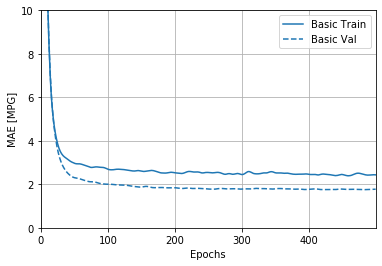

In [159]:
plotter.plot({'Basic': history}, metric = "mean_absolute_error")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

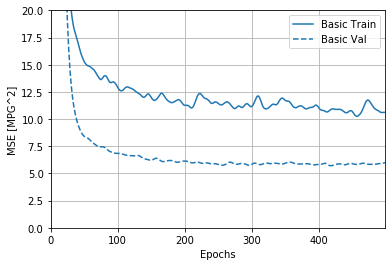

In [162]:
plotter.plot({'Basic': history}, metric = "mean_squared_error")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

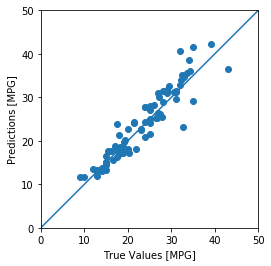

In [163]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

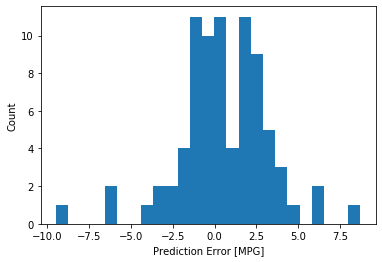

In [164]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")